<a href="https://colab.research.google.com/github/itsRajatkumar/face_recognition_with_database/blob/main/Deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
! pip install deepface
! pip install pysqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysqlite3: filename=pysqlite3-0.5.0-cp39-cp39-linux_x86_64.whl size=160232 sha256=f7920fdf0af0e74434c1ac9855d613fd569c19396a0a8fc3bb1dee2d4535f578
  Stored in directory: /root/.cache/pip/wheels/40/4e/92/7d526d42e2cdd1eb0e7d73cf8ed5bd76b93818b720ab82fc74
Successfully built pysqlite3


In [39]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [61]:
# Create a table for storing face encodings
import sqlite3
conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
# conn = sqlite3.connect("mydatabase.db")
cur = conn.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS face_encodings (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    image BLOB,
    e1 FLOAT NOT NULL,
    e2 FLOAT NOT NULL,
    e3 FLOAT NOT NULL,
    e4 FLOAT NOT NULL,
    e5 FLOAT NOT NULL,
    e6 FLOAT NOT NULL,
    e7 FLOAT NOT NULL,
    e8 FLOAT NOT NULL,
    e9 FLOAT NOT NULL,
    e10 FLOAT NOT NULL,
    e11 FLOAT NOT NULL,
    e12 FLOAT NOT NULL,
    e13 FLOAT NOT NULL,
    e14 FLOAT NOT NULL,
    e15 FLOAT NOT NULL,
    e16 FLOAT NOT NULL,
    e17 FLOAT NOT NULL,
    e18 FLOAT NOT NULL,
    e19 FLOAT NOT NULL,
    e20 FLOAT NOT NULL,
    e21 FLOAT NOT NULL,
    e22 FLOAT NOT NULL,
    e23 FLOAT NOT NULL,
    e24 FLOAT NOT NULL,
    e25 FLOAT NOT NULL,
    e26 FLOAT NOT NULL,
    e27 FLOAT NOT NULL,
    e28 FLOAT NOT NULL,
    e29 FLOAT NOT NULL,
    e30 FLOAT NOT NULL,
    e31 FLOAT NOT NULL,
    e32 FLOAT NOT NULL,
    e33 FLOAT NOT NULL,
    e34 FLOAT NOT NULL,
    e35 FLOAT NOT NULL,
    e36 FLOAT NOT NULL,
    e37 FLOAT NOT NULL,
    e38 FLOAT NOT NULL,
    e39 FLOAT NOT NULL,
    e40 FLOAT NOT NULL,
    e41 FLOAT NOT NULL,
    e42 FLOAT NOT NULL,
    e43 FLOAT NOT NULL,
    e44 FLOAT NOT NULL,
    e45 FLOAT NOT NULL,
    e46 FLOAT NOT NULL,
    e47 FLOAT NOT NULL,
    e48 FLOAT NOT NULL,
    e49 FLOAT NOT NULL,
    e50 FLOAT NOT NULL,
    e51 FLOAT NOT NULL,
    e52 FLOAT NOT NULL,
    e53 FLOAT NOT NULL,
    e54 FLOAT NOT NULL,
    e55 FLOAT NOT NULL,
    e56 FLOAT NOT NULL,
    e57 FLOAT NOT NULL,
    e58 FLOAT NOT NULL,
    e59 FLOAT NOT NULL,
    e60 FLOAT NOT NULL,
    e61 FLOAT NOT NULL,
    e62 FLOAT NOT NULL,
    e63 FLOAT NOT NULL,
    e64 FLOAT NOT NULL,
    e65 FLOAT NOT NULL,
    e66 FLOAT NOT NULL,
    e67 FLOAT NOT NULL,
    e68 FLOAT NOT NULL,
    e69 FLOAT NOT NULL,
    e70 FLOAT NOT NULL,
    e71 FLOAT NOT NULL,
    e72 FLOAT NOT NULL,
    e73 FLOAT NOT NULL,
    e74 FLOAT NOT NULL,
    e75 FLOAT NOT NULL,
    e76 FLOAT NOT NULL,
    e77 FLOAT NOT NULL,
    e78 FLOAT NOT NULL,
    e79 FLOAT NOT NULL,
    e80 FLOAT NOT NULL,
    e81 FLOAT NOT NULL,
    e82 FLOAT NOT NULL,
    e83 FLOAT NOT NULL,
    e84 FLOAT NOT NULL,
    e85 FLOAT NOT NULL,
    e86 FLOAT NOT NULL,
    e87 FLOAT NOT NULL,
    e88 FLOAT NOT NULL,
    e89 FLOAT NOT NULL,
    e90 FLOAT NOT NULL,
    e91 FLOAT NOT NULL,
    e92 FLOAT NOT NULL,
    e93 FLOAT NOT NULL,
    e94 FLOAT NOT NULL,
    e95 FLOAT NOT NULL,
    e96 FLOAT NOT NULL,
    e97 FLOAT NOT NULL,
    e98 FLOAT NOT NULL,
    e99 FLOAT NOT NULL,
    e100 FLOAT NOT NULL,
    e101 FLOAT NOT NULL,
    e102 FLOAT NOT NULL,
    e103 FLOAT NOT NULL,
    e104 FLOAT NOT NULL,
    e105 FLOAT NOT NULL,
    e106 FLOAT NOT NULL,
    e107 FLOAT NOT NULL,
    e108 FLOAT NOT NULL,
    e109 FLOAT NOT NULL,
    e110 FLOAT NOT NULL,
    e111 FLOAT NOT NULL,
    e112 FLOAT NOT NULL,
    e113 FLOAT NOT NULL,
    e114 FLOAT NOT NULL,
    e115 FLOAT NOT NULL,
    e116 FLOAT NOT NULL,
    e117 FLOAT NOT NULL,
    e118 FLOAT NOT NULL,
    e119 FLOAT NOT NULL,
    e120 FLOAT NOT NULL,
    e121 FLOAT NOT NULL,
    e122 FLOAT NOT NULL,
    e123 FLOAT NOT NULL,
    e124 FLOAT NOT NULL,
    e125 FLOAT NOT NULL,
    e126 FLOAT NOT NULL,
    e127 FLOAT NOT NULL,
    e128 FLOAT NOT NULL)
''')

In [73]:
import sqlite3
import os

# Connect to database
conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
# conn = sqlite3.connect("mydatabase.db")
cur = conn.cursor()

def convertToBinaryData(filename):
    with open(filename, 'rb') as file:
        blobData = file.read()
    return blobData

image_files = []
# image_files = ["/content/1658741346634.jpg","/content/58185478.jpg","/content/IMG_20210119_151744.jpg"]
for subdir, dirs, files in os.walk("/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Rajat Kumar Prajapti/"):
    # count = 1
    for file in files:
        # if(count >= 5):
        #   break;
        image_files.append( subdir + "/" +file)
        count = count + 1
        

count =1

print(image_files[0].split("/")[-2])
for image_file in image_files:
    try:
        BlobData = convertToBinaryData(image_file)
        # print(BlobData)
        face_encoding_obj = DeepFace.represent(image_file, model_name="Facenet")
        face_encodings = face_encoding_obj[0]["embedding"]
        query = f'''INSERT INTO face_encodings 
        (name, image, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28, e29, e30, e31, e32, e33, e34, e35, e36, e37, e38, e39, e40, e41, e42, e43, e44, e45, e46, e47, e48, e49, e50, e51, e52, e53, e54, e55, e56, e57, e58, e59, e60, e61, e62, e63, e64, e65, e66, e67, e68, e69, e70, e71, e72, e73, e74, e75, e76, e77, e78, e79, e80, e81, e82, e83, e84, e85, e86, e87, e88, e89, e90, e91, e92, e93, e94, e95, e96, e97, e98, e99, e100, e101, e102, e103, e104, e105, e106, e107, e108, e109, e110, e111, e112, e113, e114, e115, e116, e117, e118, e119, e120, e121, e122, e123, e124, e125, e126, e127, e128)
        VALUES ( "{count}", ?, {', '.join(str(e) for e in face_encodings)})'''
        # Execute query
        cur.execute(query, (BlobData,))
        print(f"completed {count}")
        count = count + 1
    except Exception as e:
        print(f"{image_file} with error {e}")
        continue
conn.commit()
print("Completed")
# Build INSERT query
conn.commit()

# Close database connection
cur.close()
conn.close()

content
completed 1
completed 2
completed 3
Completed


In [144]:
from zmq import backend
import sqlite3
import numpy as np
import math
from deepface import DeepFace
from PIL import Image
import io
import base64

def getImageObjectFromBinaryData(blobData):
    file = io.BytesIO(blobData)
    img = Image.open(file)
    return img

def convertImageToBase64(img):
    buffer = io.BytesIO()
    img.save(buffer, format="JPEG")
    img_str = base64.b64encode(buffer.getvalue())
    return f"data:image/jpeg;base64,{img_str.decode('utf-8')}"

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def sqlite_power(x,n):
    return (x)**n
# Connect to database
def detect_who_is_this(imageFile):
    conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
    cur = conn.cursor()
    conn.create_function('sqrt', 1, math.sqrt)
    conn.create_function("power", 2, sqlite_power)

    # Load test face image and compute encoding
    # face_encoding_obj = DeepFace.represent(image_file, model_name="Facenet")
    # test_face_encoding = face_encoding_obj[0]["embedding"]
    encodings = DeepFace.represent( imageFile, model_name="Facenet")
    face_encoding = encodings[0]["embedding"]
    
    query = f'''SELECT * FROM face_encodings
            ORDER BY 1 - (
                ({' + '.join(f"({str(e)} * e{1+i})" for i, e in enumerate(face_encoding))})
                /
                    ({' + '.join(f"({str(e)}) * ({str(e)})" for e in face_encoding)})
                    *
                    ( SQRT(e1 * e1 + e2 * e2 + e3 * e3 + e4  * e4 + e5 * e5 + e6 * e6 + e7 * e7 + e8 * e8 + e9 * e9 + e10  * e10 + e11  * e11 + e12  * e12 + e13  * e13 + e14  * e14 + e15  * e15 + e16  * e16 + e17  * e17 + e18  * e18 + e19  * e19 + e20  * e20 + e21  * e21 + e22  * e22 + e23  * e23 + e24  * e24 + e25  * e25 + e26  * e26 + e27  * e27 + e28  * e28 + e29  * e29 + e30  * e30 + e31  * e31 + e32  * e32 + e33  * e33 + e34  * e34 + e35  * e35 + e36  * e36 + e37  * e37 + e38  * e38 + e39  * e39 + e40  * e40 + e41  * e41 + e42  * e42 + e43  * e43 + e44  * e44 + e45  * e45 + e46  * e46 + e47  * e47 + e48  * e48 + e49  * e49 + e50  * e50 + e51  * e51 + e52  * e52 + e53  * e53 + e54  * e54 + e55  * e55 + e56  * e56 + e57  * e57 + e58  * e58 + e59  * e59 + e60  * e60 + e61  * e61 + e62  * e62 + e63  * e63 + e64  * e64 + e65  * e65 + e66  * e66 + e67  * e67 + e68  * e68 + e69  * e69 + e70  * e70 + e71  * e71 + e72  * e72 + e73  * e73 + e74  * e74 + e75  * e75 + e76  * e76 + e77  * e77 + e78  * e78 + e79  * e79 + e80  * e80 + e81  * e81 + e82  * e82 + e83  * e83 + e84  * e84 + e85  * e85 + e86  * e86 + e87  * e87 + e88  * e88 + e89  * e89 + e90  * e90 + e91  * e91 + e92  * e92 + e93  * e93 + e94  * e94 + e95  * e95 + e96  * e96 + e97  * e97 + e98  * e98 + e99  * e99 + e100 * e100 + e101 * e101 + e102 * e102 + e103 * e103 + e104 * e104 + e105 * e105 + e106 * e106 + e107 * e107 + e108 * e108 + e109 * e109 + e110 * e110 + e111 * e111 + e112 * e112 + e113 * e113 + e114 * e114 + e115 * e115 + e116 * e116 + e117 * e117 + e118 * e118 + e119 * e119 + e120 * e120 + e121 * e121 + e122 * e122 + e123 * e123 + e124 * e124 + e125 * e125 + e126 * e126 + e127 * e127 + e128 * e128) 
            )
            )
            LIMIT 3'''

    cur.execute(query)
    results = cur.fetchall()
    returned_output = []
    for result in results:
        
        image = getImageObjectFromBinaryData(result[2])
        # image.show()
        is_same = DeepFace.verify(img1_path = imageFile, img2_path = convertImageToBase64(image), model_name="Facenet", detector_backend= "retinaface")
        if( is_same["distance"] < .4 and is_same["verified"]):
            cur.close()
            conn.close()
            return [
                {
                    "Exact": True,
                    "distance": is_same["distance"] ,
                    "data": result[0:2],
                    "Image": image
                }
            ]
        returned_output.append( {
                    "Exact":False,
                    "distance": is_same["distance"] ,
                    "data": result[0:2],
                    "Image": image
                })
    # is_matched = face_recognition.compare_faces([np.array(result[2:])], test_face_encoding)
    cur.close()
    conn.close()
    return returned_output
    # return {
    #     "Matched":is_matched[0], 
    #     "Name":result[1]
    # }


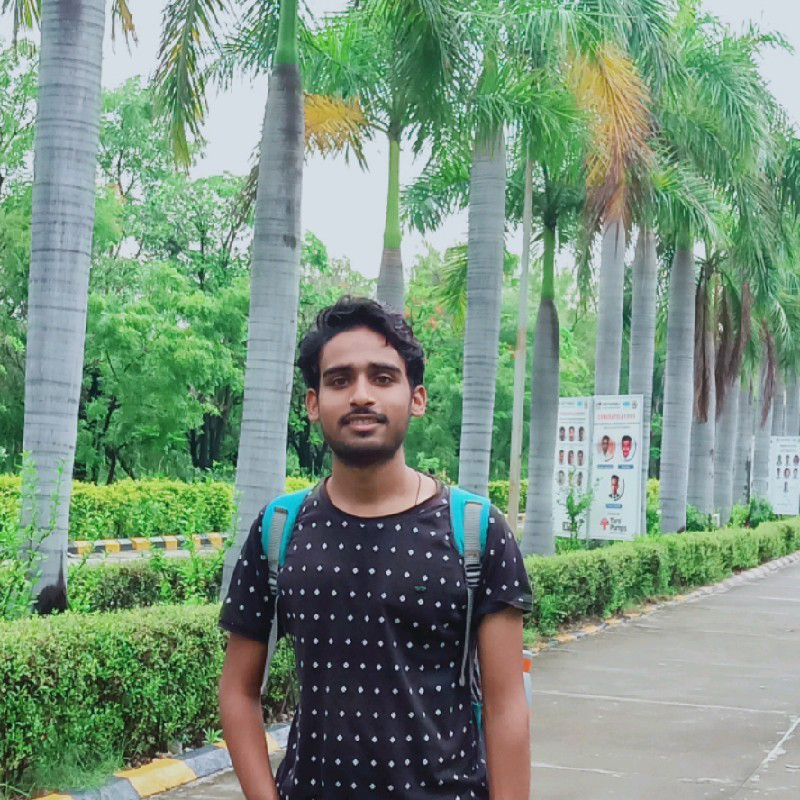

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x800 at 0x7FE523E31040>
(1, '1')


In [145]:
result = (detect_who_is_this("/content/1658741346634.jpg"))
for item in result:
    if(item["Exact"]):
        item["Image"].show()
        print(item["Image"])
        print(item["data"])

In [ ]:




# def findCosineDistance(source_representation, test_representation):
#     a = np.matmul(np.transpose(source_representation), test_representation)
#     b = np.sum(np.multiply(source_representation, source_representation))
#     c = np.sum(np.multiply(test_representation, test_representation))
#     return 1 - (a / (np.sqrt(b) * np.sqrt(c)))


# # ls = [0.28018414974212646, -2.171558380126953, -1.0142525434494019, 1.7272144556045532, -0.40706783533096313, 1.0624111890792847, -0.9731243848800659, 1.5941954851150513, 1.4558720588684082, 1.176421046257019, -2.2234342098236084, -0.8471732139587402, -0.47892796993255615, -0.007435530424118042, -0.6452603340148926, 1.5100373029708862, 1.4305448532104492, 1.7462985515594482, 0.5761614441871643, -0.20460398495197296, 0.045475736260414124, 0.6554235219955444, 0.8596735000610352, 0.15663115680217743, 0.2693384885787964, 0.19464850425720215, -0.18745523691177368, -0.3041156232357025, 0.7929112911224365, -0.04544062912464142, -0.2973116636276245, 0.5348457098007202, -1.2854349613189697, 0.23225566744804382, 1.6133452653884888, -1.0876981019973755, -1.4449526071548462, 0.9598800539970398, 1.0427695512771606, 0.07278745621442795, -0.985049307346344, 0.17213431000709534, 1.1819422245025635, -0.24230486154556274, 0.5602160692214966, -0.29250359535217285, 0.4892689883708954, -1.017085313796997, -0.8198117017745972, 2.532538414001465, -0.5899391174316406, 0.03415292873978615, -0.38065022230148315, 1.0286777019500732, 1.6690278053283691, -1.0588998794555664, -0.5169639587402344, -0.835459291934967, -0.4962725043296814, -0.5047807693481445, -0.8895493149757385, -1.6298649311065674, 2.157007932662964, -0.9808381795883179, -0.41581395268440247, -0.006259746849536896, -0.9631195068359375, 1.0505452156066895, -1.073799729347229, -2.1795289516448975, -1.2484568357467651, -0.6570483446121216, 0.16139349341392517, -0.5414199233055115, 1.3546332120895386, -0.05216827616095543, -2.5366604328155518, -0.6567538380622864, 0.6832134127616882, -0.5242050886154175, 0.9128648638725281, -0.6484552621841431, 0.19299331307411194, 0.1360882669687271, -0.6302871108055115, -0.4352434277534485, -0.674767017364502, 0.3835180401802063, -0.93357253074646, 1.0258265733718872, 0.44161683320999146, 0.2713167071342468, -1.8943589925765991, -0.2020813524723053, -1.060394525527954, 0.1287587434053421, -1.5331119298934937, -0.00934538058936596, -0.014982804656028748, 0.08345501124858856, -0.1454532891511917, 1.5103590488433838, -0.9108123779296875, -0.23244182765483856, 0.18382158875465393, -1.4144307374954224, -1.841355323791504, 0.777340292930603, -1.4322597980499268, -1.4355034828186035, 2.403653621673584, 0.04224658012390137, 0.7220505475997925, -0.39387133717536926, -0.43755045533180237, -2.025951623916626, 0.4103661775588989, -0.3033260405063629, -0.09168399125337601, -1.3706035614013672, 0.24647793173789978, -1.295045256614685, -0.18561279773712158, -0.045831099152565, -1.6000651121139526, 0.07445531338453293, -0.7265017628669739, -1.1294445991516113]
# # query = f'''SELECT id, name,image FROM face_encodings
# # query = 


# import math
# import sqlite3

# def sqlite_power(x,n):
#     return (x)**n
# # Connect to database
# conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
# cur = conn.cursor()
# conn.create_function('sqrt', 1, math.sqrt)
# conn.create_function("power", 2, sqlite_power)

# cur.execute(query)
# results = cur.fetchall()

# # def writeBinaryDataToFile(blobData, filename):
# #     with open(filename, 'wb') as file:
# #         file.write(blobData)




In [ ]:
# import deepface
# from deepface import DeepFace
# import cv2
# from deepface.commons import functions, realtime, distance as dst


# import numpy as np

# def findCosineDistance(source_representation, test_representation):
#     a = np.matmul(np.transpose(source_representation), test_representation)
#     b = np.sum(np.multiply(source_representation, source_representation))
#     c = np.sum(np.multiply(test_representation, test_representation))
#     print(a)
#     print(b)
#     print(c)
#     return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# # # get the face encodings
# encodings1 = DeepFace.represent("/content/1658741346634.jpg", model_name="Facenet")
# encodings2 = DeepFace.represent("/content/IMG_20210119_151744.jpg", model_name="Facenet")

# print((encodings1[0]["embedding"]))

# # calculate the similarity score
# distance1 = dst.findEuclideanDistance(dst.l2_normalize(encodings1[0]["embedding"]), dst.l2_normalize(encodings2[0]["embedding"]))
# distance2 = dst.findEuclideanDistance((encodings1[0]["embedding"]),(encodings2[0]["embedding"]))
# distance3 = findCosineDistance((encodings1[0]["embedding"]),(encodings2[0]["embedding"]))

# # # print the similarity score
# print("Similarity score Euclidean Distance l2 : ", distance1)
# print("Similarity score Euclidean Distance: ", distance2)
# print("Similarity score Cosine: ", distance3)

[0.28018414974212646, -2.171558380126953, -1.0142525434494019, 1.7272144556045532, -0.40706783533096313, 1.0624111890792847, -0.9731243848800659, 1.5941954851150513, 1.4558720588684082, 1.176421046257019, -2.2234342098236084, -0.8471732139587402, -0.47892796993255615, -0.007435530424118042, -0.6452603340148926, 1.5100373029708862, 1.4305448532104492, 1.7462985515594482, 0.5761614441871643, -0.20460398495197296, 0.045475736260414124, 0.6554235219955444, 0.8596735000610352, 0.15663115680217743, 0.2693384885787964, 0.19464850425720215, -0.18745523691177368, -0.3041156232357025, 0.7929112911224365, -0.04544062912464142, -0.2973116636276245, 0.5348457098007202, -1.2854349613189697, 0.23225566744804382, 1.6133452653884888, -1.0876981019973755, -1.4449526071548462, 0.9598800539970398, 1.0427695512771606, 0.07278745621442795, -0.985049307346344, 0.17213431000709534, 1.1819422245025635, -0.24230486154556274, 0.5602160692214966, -0.29250359535217285, 0.4892689883708954, -1.017085313796997, -0.81